# Librerías

In [2]:
import numpy as np #para manejar arreglos
from matplotlib import pyplot as plt #para graficar
import sympy as sp


# Funciones practica 2

## Euler

In [3]:
def euler( t0, tf, z0, f, h = None, N = None):
  
  if h is None and N is None:
    raise ValueError("Debe proporcionar h o N")
  if h is not None and N is not None:
    raise ValueError("Debe proporcionar h o N, no ambos")
  if N is not None:
    h = (tf - t0)/N
  if h is not None:
    N = int((tf-t0)/h)

  t = np.linspace(t0,tf,N + 1)
  z = np.zeros((len(z0),N+1))
  z[:,0] = z0
  
  for i in range(N):
    z[:,i+1] = z[:,i] + h*f(t[i],z[:,i])

  return t,z,h,N

## Taylor orden 2

In [4]:
def taylor_orden_dos(t0,tf,x0,f,h = None, N = None):

    if h is None and N is None:
        raise ValueError("Debe proporcionar h o N")
    if h is not None and N is not None:
        raise ValueError("Debe proporcionar h o N, no ambos")
    if N is not None:
        h = (tf - t0)/N
    if h is not None:
        N = int((tf-t0)/h)
    
    t, x = sp.symbols('t x', real=True)
    f_t = sp.diff(f, t)
    f_x = sp.diff(f, x)

    f    = sp.lambdify((t, x), f,"numpy")
    f_tl = sp.lambdify((t, x), f_t,"numpy")
    f_xl = sp.lambdify((t, x), f_x,"numpy")
  

    # Defino la grilla equiespaciada
    t = np.linspace(t0, tf, N + 1)
    # Guardo lugar para la solución de la EDO
    x = np.zeros(N+1)
    # Uso la condición inicial
    x[0]= x0
    # Obtengo la aproximación via la ecuación de recurrencia del método de Taylor
    for i in range(N):
        x[i+1] = x[i]+h*f(t[i],x[i]) + (1/2)*(f_tl(t[i],x[i]) + f_xl(t[i],x[i])*f(t[i],x[i]))*(h**2)

    # Devuelvo la grilla y la solución aproximada
    return t, x, h, N

## Euler modificado

In [5]:
def euler_modificado(t0, tf, z0, f, h = None, N = None):

    if h is None and N is None:
        raise ValueError("Debe proporcionar h o N")
    if h is not None and N is not None:
        raise ValueError("Debe proporcionar h o N, no ambos")
    if N is not None:
        h = (tf - t0)/N
    if h is not None:
        N = int((tf-t0)/h)

    t = np.linspace(t0,tf,N+1)
    z = np.zeros((len(z0),N+1))
    z[:,0] = z0

    for i in range(N):
        z[:,i+1] = z[:,i] + h*f(t[i] + h/2,z[:,i] + (h/2)*f(t[i],z[:,i]))

    return t,z,h,N

# Practica 2

### Ejercicio 1

Escribir un programa que implemente el método de Euler explícito para resolver
ecuaciones de la forma

$y' = f(t,y), \qquad y(t_0) = y_0$,

tomando como parámetros la función $f$, los tiempos inicial y final $t_0$ y $t_f$, el paso $h$ y el dato
inicial $y_0$; y arrojando como resultados el vector 
$t = (t_0,\, t_0 + h,\, \ldots,\, t_f)$
y la solución $y$.

In [6]:
def euler_ejercicio1(t0,tf,x0,h,f):
  N = int((tf-t0)/h)
  T = np.linspace(t0,tf,N+1)
  X = np.zeros(N+1)
  X[0] = x0

  for i in range(N):
    X[i+1] = X[i] + h*f(T[i],X[i])
  return T,X,h

### Ejercicio 2

Se considera la siguiente ecuación diferencial

\begin{cases}
y'(t) = 2y(t) - 5\sin(t), \\
y(0) = 1,
\end{cases}

cuya solución exacta es la función y(t) = 2\sin(t) + \cos(t).

Cantidad de pasos = 0.001


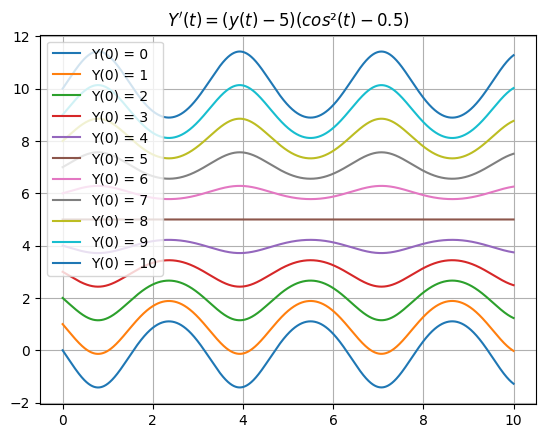

In [7]:
k = np.arange(0,11)
plt.figure()
plt.title(r"$Y'(t) = (y(t)-5)(cos²(t)-0.5)$")

for i in k:
  T,Y,h,N = euler(0,10,np.array([i]),lambda t,y: (y-5)*((np.cos(t))**2-0.5),h = 0.001)
  plt.plot(T,Y[0],'-',label = f'Y(0) = {i}')

plt.grid()
plt.legend()

print(f'Cantidad de pasos = {h}')

### Ejercicio 3

Se considera la siguiente ecuación diferencial:

\begin{cases}
y'(t) = 2y(t) - 5\sin(t), \\
y(0) = 1
\end{cases}

cuya solución exacta es la función $y(t) = 2\sin(t) + \cos(t)$.

(a) Escribir la iteración del método de Euler para esta ecuación. 

(b) Calcular el error de truncado local. 

(c) ¿Qué paso $h$ debe elegirse para que el error al estimar 



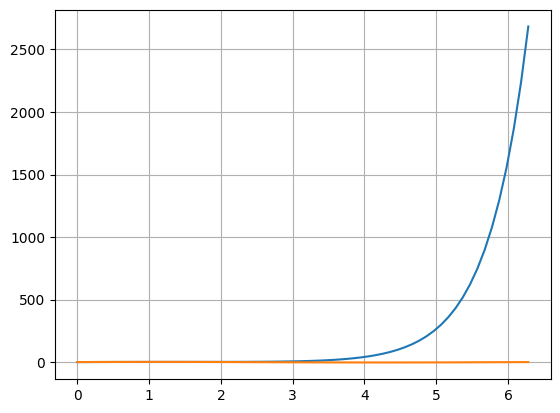

In [8]:


T, Y , h, N = euler(0,2*np.pi,np.array([1]),lambda t, y:2*y - 5*sp.sin(t), h = 0.1)

def y_real(t):
    return 2*np.sin(t) + np.cos(t)

Y_real = y_real(T)


plt.figure()
plt.plot(T,Y[0],'-')
plt.plot(T,Y_real)
plt.grid()




### Ejercicio 5

Se quiere verificar num\'ericamente el orden de convergencia de los m\'etodos de
Euler y Taylor de orden 2. Para ello: resolver num\'ericamente el problema
$y' = y$, $y(0) = 1$,
en el intervalo $[0, 1]$ con ambos m\'etodos, tomando $h = 2^{-k}$ para $k = 2, \ldots , 8$. 
Para cada $h$ calcular el error que se comete al aproximar $y(1)$: 
$e_h = |y(1) - y_N|$. Graficar $\log(e_h)$ en funci\'on de $\log(h)$. 

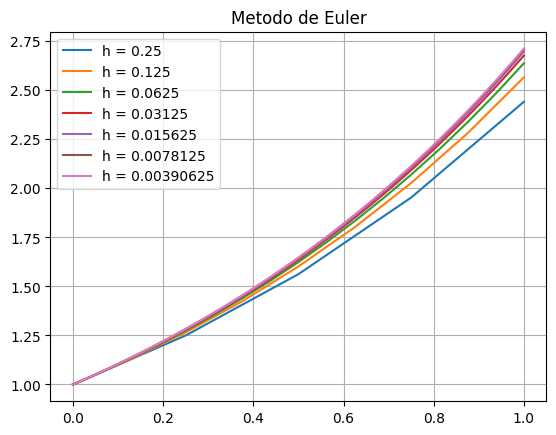

In [9]:
k = np.arange(2,9)
h = []

for i in k:
  h.append(float(2)**(-i))

h = np.array(h)

plt.figure()
plt.title('Metodo de Euler')

for i in h:
  T,Y,h,N = euler(0,1,np.array([1]),lambda t,y:y,h = i)
  plt.plot(T,Y[0],label = f'h = {h}')

plt.grid()
plt.legend()

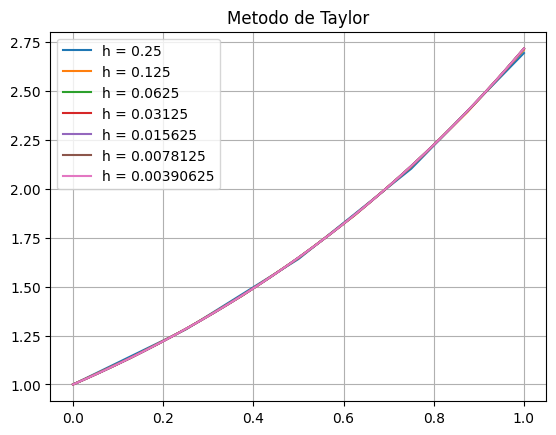

In [10]:
k = np.arange(2,9)
h = []

for i in k:
  h.append(float(2)**(-i))

h = np.array(h)

plt.figure()
plt.title('Metodo de Taylor')

x ,t = sp.symbols('x t', real=True)
funcion = x

for i in h:
  T,Y,h,N= taylor_orden_dos(0,1,1,funcion, h = i)
  plt.plot(T,Y,label = f'h = {i}')

plt.grid()
plt.legend()

### Ejemplo guia

Estudiamos el sistema (el PVI mejor dicho):
$$
\begin{cases}
x'&= -0.5x+0.02xy\\
y' &= y-0.02xy\\
x(0)&=4 \\
y(0) &= 20
\end{cases}
$$
Donde $x$ es la población de predadores, $y$ la de presas.

(2, 30001)
[4.         3.9996     3.99920151 3.99880454]


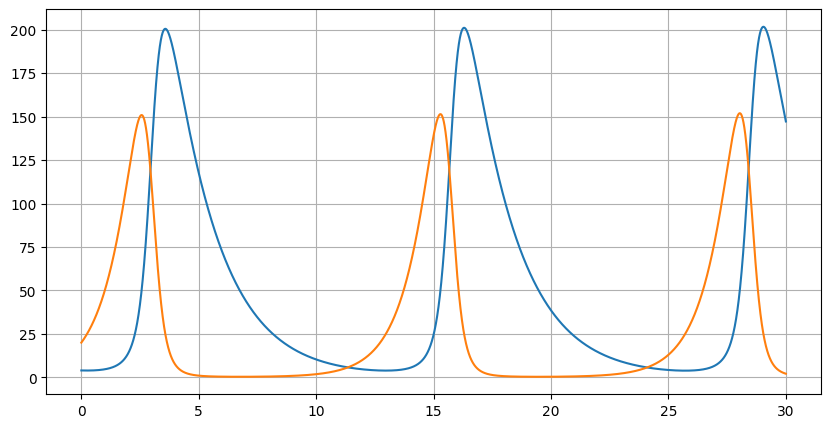

In [11]:
T,Z, h, N = euler(0,30,np.array([4,20]),lambda t,z: np.array([-0.5*z[0] + 0.02*z[0]*z[1],z[1] - 0.02*z[0]*z[1]]), h = 10**(-3))
print(Z.shape)
print(Z[0,0:4])
plt.figure(figsize=(10,5))
plt.plot(T,Z[0],label = 'Predadores')
plt.plot(T,Z[1],label = 'Presas')
plt.grid()

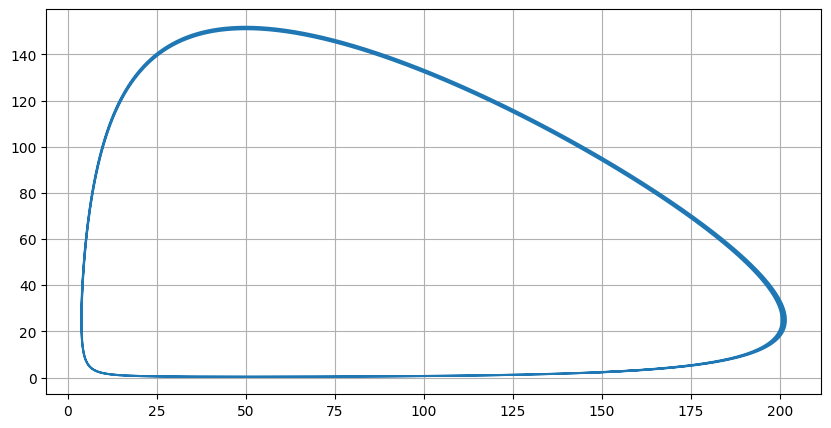

In [12]:
plt.figure(figsize=(10,5))
plt.plot(Z[0,:],Z[1,:])
plt.grid()

### Ejercicio 13

La posición de un objeto en caída libre puede modelarse con la ecuación:

$\begin{equation}
    \ddot{x} = \frac{\gamma}{m} \dot{x}^{2} - g
\end{equation}$

siendo $x$ la altura, $m$ la masa del cuerpo, $g = 9.81 \,\text{m/s}^{2}$ la aceleración gravitatoria y $\gamma$ una
constante que representa el rozamiento con el fluido en que se produce la caída. Deben darse
condiciones sobre la altura y la velocidad iniciales.


La Torre de Pisa mide $55.8 \,\text{m}$. La masa de una bala de cañón es de $16 \,\text{Kg}$, y la de una
bala de mosquete $0.0082 \,\text{Kg}$. Las constantes de rozamiento para cada bala son:$ \gamma_{c} = 0.0058 \quad \text{y} \quad \gamma_{m} = 3.74 \times 10^{-5}$, respectivamente (la diferencia se debe a la diferencia de tamaños).


$\ddot{x} = \frac{\gamma}{m} \cdot \dot{x}^2-g$ 

$x_1 = x$;
$x_2 = \dot{x}$

$\dot{x_1} = x_2$

$\dot{x_2} = \frac{\gamma}{m} \cdot x_2^2-g$



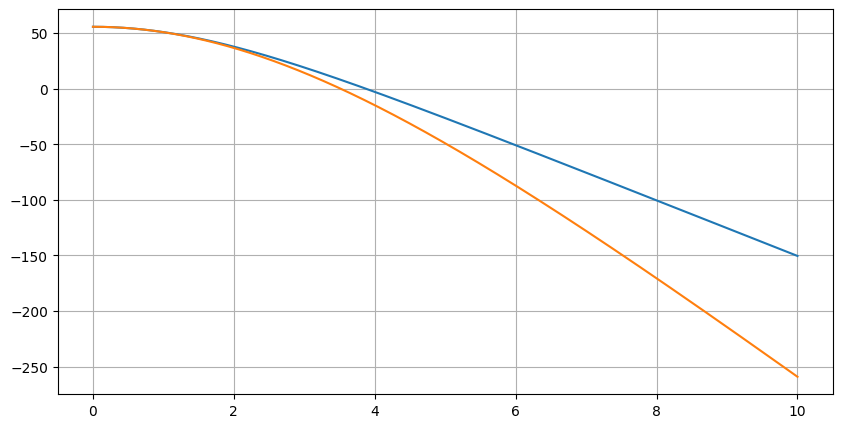

In [13]:
g = 9.81
gamma_c = 0.25
gamma_m = 3.74e-5
m_c = 16
m_m = 0.0082
z0 = np.array([55.8,0])


Tc,Zc, h, N = euler(0,10,z0,lambda t,z: np.array([z[1],(gamma_c/m_c)*(z[1]**2) - g]), h = 10**(-3))
Tm,Zm, h, N = euler(0,10,z0,lambda t,z: np.array([z[1],(gamma_m/m_m)*(z[1]**2) - g]), h = 10**(-3))



plt.figure(figsize=(10,5))
plt.plot(Tc,Zc[0],label = 'Caida cañon')
plt.plot(Tc,Zm[0],label = 'Caida mosquete')
plt.grid()



### Ejercicio 14

Tiro oblicuo: Un proyectil de masa $m$ se arroja desde un punto del plano
$(x_0, y_0)$, con una velocidad inicial dada por el vector $(v_{x0}, v_{y0})$.
La trayectoria del proyectil se rige por las ecuaciones dadas por la segunda
ley de Newton:

$m \ddot{x} = -\gamma \dot{x},
\qquad$
$m \ddot{y} = -mg - \gamma \dot{y}$

donde $g$ es la aceleración gravitatoria $g = 9.81 \,\text{m/s}^{2}$, y
$\gamma$ es una constante de rozamiento con el medio en que se realiza el
lanzamiento. Formular el problema en forma de sistema de orden uno.



Tomando $m = 10 \,\text{Kg}$ y $\gamma = 0.2 \,\text{Kg/s}$, y suponiendo que
el proyectil se lanza desde $30 \,\text{m}$ de altura con una velocidad inicial
horizontal de $40 \,\text{m/s}$, ¿qué distancia recorre antes de tocar el piso?


\begin{cases}
\dot{x} = v_x, \\[6pt]
\dot{v}_x = -\dfrac{\gamma}{m} v_x, \\[6pt]
\dot{y} = v_y, \\[6pt]
\dot{v}_y = -g - \dfrac{\gamma}{m} v_y.
\end{cases}

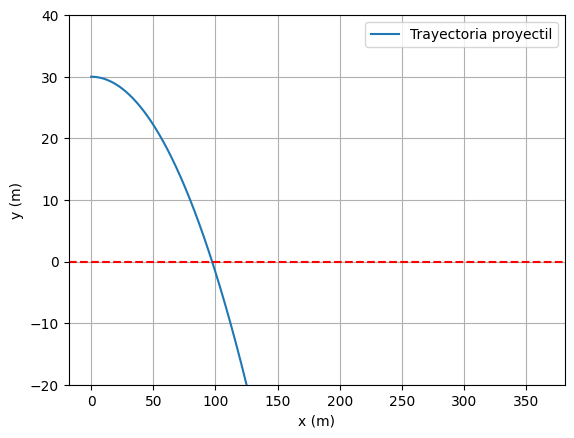

In [14]:
g = 9.81
m = 10
gamma = 0.2
z0 = np.array([0,40,30,0])

T,Z,h,N = euler_modificado(0, 10, z0, lambda t,z : np.array([z[1],-(gamma/m)*z[1],z[3],-(gamma/m)*z[3]-g]), h = 1e-3)

plt.figure()
plt.plot(Z[0],Z[2],label = 'Trayectoria proyectil')
plt.axhline(0,linestyle = '--',color = 'red')

plt.xlabel('x (m)')
plt.ylabel('y (m)') 
plt.legend()
plt.ylim(-20,40)
plt.grid()

### Ejercicio 15

Durante un brote de una enfermedad en la ciudad de Macondo se puede dividir
a la población entre los grupos $\textit{susceptibles}$ de contraer la enfermedad $(S)$,
$\textit{infectadxs}$ $(I)$ y $\textit{recuperadxs}$ $(R)$. La relación entre el número de personas en cada
grupo está definida por el siguiente sistema de ODEs:

\begin{aligned}
\frac{dS}{dt} &= -\beta\,\frac{S I}{N},\\
\frac{dI}{dt} &= \beta\,\frac{S I}{N} - \gamma I,\\
\frac{dR}{dt} &= \gamma I.
\end{aligned}

con $\beta$ y $\gamma$ las tasas de infección y recuperación respectivamente.

(a) Interpretar el sentido de las ecuaciones.

(b) Considerar que la ciudad tiene una población de $N = 10000$ habitantes e inicialmente
todas las personas son susceptibles. Supondremos una tasa de transmisión $\beta = 0.2$ y
un tiempo medio de recuperación de 10 días. Si inicialmente hay una única persona enferma,
discutir de qué forma deberían evolucionar las poblaciones de cada grupo.

(c) Simular y graficar la soluci´on que se obtiene al utilizar el comando scipy.integrate.
solve_ivp, que aplica un m´etodo de Runge-Kutta de orden 4.

(d) Asumiendo que no se producen fallecimientos, verificar que la poblaci´on de la ciudad se
mantiene constante a lo largo de la simulacìon.

(e) Determinar el tiempo a partir del cual, sin acciones externas, la cantidad de infecciones
comienza a descender.

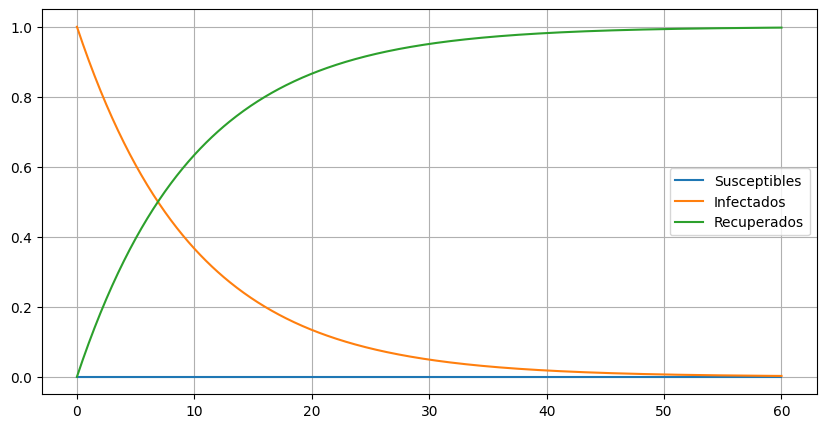

In [15]:
N = 10000
beta = 0.2
gamma = 1/10

T,Z,h,N = euler(0,60,np.array([0,1,0]),lambda t,z: np.array([-beta*z[0]*z[1]/N,beta*z[0]*z[1]/N - gamma*z[1],gamma*z[1]]), h = 0.1)


plt.figure(figsize=(10,5))
plt.plot(T,Z[0],label = 'Susceptibles')
plt.plot(T,Z[1],label = 'Infectados')
plt.plot(T,Z[2],label = 'Recuperados')

plt.legend()
plt.grid()

# Funciones practica 3

## Contornos

In [61]:
def contornos(t0,tf,z0,a,k,c,f = lambda t: 0,h = None,N = None):
    if h is None and N is None:
        raise ValueError("Debe proporcionar h o N")
    if h is not None and N is not None:
        raise ValueError("Debe proporcionar h o N, no ambos")
    if N is not None:
        h = (tf - t0)/N
    if h is not None:
        N = int((tf-t0)/h)

    t = np.linspace(t0,tf,N+1)

    diagonal =  (-4*a + 2*(h**2)*c) * np.eye(N+1)
    diagonal_inferior = (2*a - h*k) * np.eye(N+1,k = -1)
    diagonal_superior = (2*a + h*k) * np.eye(N+1, k = 1)

    A = diagonal + diagonal_inferior + diagonal_superior    

    b = np.zeros(N+1)

    for i in range(0,N+1):
        b[i] = 2*(h**2)*f(t[i])

    b[0] -= z0[0]*(2*a - h*k)
    b[-1] -= z0[1]*(2*a + h*k)
    
    x = np.linalg.solve(A,b)

    return A, b, x, t, h, N 



## Practica 3


### Ejercicio 3

Se tiene una masa sujeta a un resorte. Suponiendo que no existe rozamiento, la posición $y(t)$ de la masa a tiempo $t$ está regida por la ecuación:

$m\ddot{y} = -ky$,


donde $m$ es la masa y $k$ la constante del resorte.
Supongamos que la masa se encuentra en movimiento y que se registra que su posición a tiempo $0$ es $y(0)=0$, mientras que a cierto tiempo $t_f$, es $y(t_f)=y_f$.

(a) Discretizar el intervalo $[0, t_f ]$ con paso h. Utilizando la discretizaci´on usual para la
derivada segunda y teniendo en cuenta las condiciones de contorno, discretizar el
problema, formul´andolo como un sistema lineal.

(b) Hacer un programa que reciba como input la masa m, la constante k y el paso h,
construya la matriz del sistema, lo resuelva, y grafique la solución.

(c) Resolver para tf = 10, con los siguientes datos:

* $y_f = 1, m = \frac{1}{4}, k = \frac{1}{2}$
* $y_f = 1, m = 0.025, k = \frac{1}{2}$
* $y_f = 1, m = \frac{1}{4}, k = 0.05$
* $y_f = 1, m = 0.025, k = 0.05$

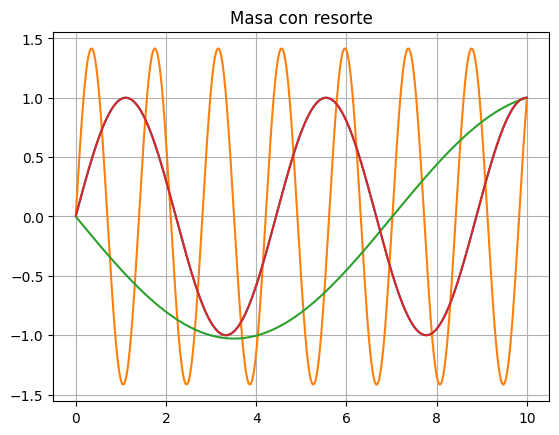

In [73]:
plt.figure()
plt.title('Masa con resorte')

for k in [0.5,0.05]:
    for m in [0.25,0.025]:
        A,b,x,t,h,N = contornos(0,10,np.array([0,1]),m,0,k,h = 0.005)
        plt.plot(t,x)

plt.grid()

### Ejercicio 4

Si al problema anterior se le agrega rozamiento y un forzante se obtiene
una ecuación de la forma
\begin{equation}
m\,\ddot y \;=\; -k\,y \;-\; c\,\dot y \;+\; f, 
\qquad \text{donde } b \text{ es el coeficiente de rozamiento y } f = f(t) \text{ el forzante.}
\end{equation}


(a) Escribir el sistema discretizado que corresponde a utilizar la discretización usual de
  la derivada segunda y diferencias centradas para la derivada primera.

(b) Repetir usando diferencias \emph{forward} para la derivada primera.

(c) Modificar el programa del ejercicio anterior para incorporar los nuevos términos de
  la ecuación utilizando diferencias centradas o \emph{forward} para la derivada primera.

(d) Para $f=0$ proponer soluciones de la forma $y(t)=A e^{\lambda t}$. Hallar valores de
  $\lambda$ en función de los parámetros $m$, $k$ y $c$. Estudiar el comportamiento de la solución de
  acuerdo a la naturaleza de los valores de $\lambda$ hallados.

(e) Resolver tomando $y_0=1$, $t_f=10$, $y_f=0$, con distintas combinaciones de los
  parámetros:

* $m=0.25$,  $m=0.025$.

* $k=0.5$,  $k=0.05$.

* $c=5\times 10^{-3}$,  $c=0.05$,  $c=0.1$.
  
Analizar si los resultados obtenidos son cualitativamente consistentes con lo esperado.


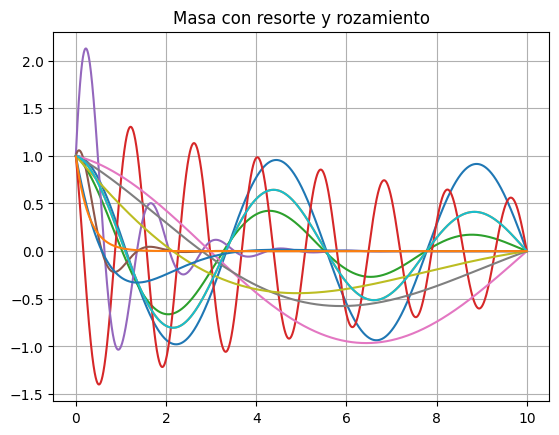

In [78]:
plt.figure()
plt.title('Masa con resorte y rozamiento')

for k in [0.5,0.05]:
    for m in [0.25,0.025]:
        for c in [5e-3,0.05,0.1]:
            A,b,x,t,h,N = contornos(0,10,np.array([1,0]),m,c,k,h = 0.002)
            plt.plot(t,x,label = f'm = {m}, b = {c}, k = {k}')
plt.grid()

### Ejercicio 6

Considerar el problema del calor estacionario en el intervalo $[0,1]$:
\begin{equation}
  -\alpha\,u''(x) = f(x),
  \qquad
  u(0) = u(1) = 0,
\end{equation}
donde $u$ representa la distribución de temperatura generada por una fuente $f$ y
$\alpha > 0$ es el coeficiente de difusividad térmica.


(a) Formular el problema de forma matricial.

(b) Estudiar el error de truncado.

(c) Resolver y graficar la solución para distintos valores de $\alpha$.


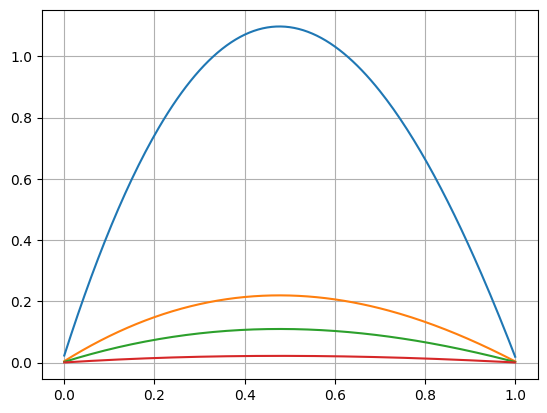

In [28]:
plt.figure()

alpha = np.array([0.1,0.5,1,5])*(-1)

for i in alpha:
    A,b,x,t,h,N = contornos(0,1,np.array([0,0]),i,0,0,f = lambda t: sp.cos(t),h = 0.005)
    plt.plot(t,x)

plt.grid()

### Ejercicio 7

# Pruebas